In [28]:
pip install wordcloud


  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from deep_translator import GoogleTranslator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [4]:
folder_path = r"C:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Sentimen Analisis BRICS\dataset sentimen"
all_files = glob.glob(folder_path + "/*.csv") + glob.glob(folder_path + "/*.CSV")

df_merged = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

df_merged.to_csv(folder_path + "/brics.csv", index=False)

In [5]:
df_merged

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1850576274789724530,Sun Oct 27 16:32:20 +0000 2024,4420,Mengapa Banyak Negara ingin bergabung dengan B...,1850576274789724530,https://pbs.twimg.com/media/Ga6MVzIaIAAfsl7.png,NaN,in,Indonesia,29,32,717,https://x.com/TxtdariHI/status/185057627478972...,1292806214955307010,TxtdariHI
1,1849709620518146488,Fri Oct 25 07:08:34 +0000 2024,79,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,1849709620518146488,https://pbs.twimg.com/media/Gat9GPMa8AA6p4M.jpg,NaN,in,Indonesia,2,4,18,https://x.com/destsoe/status/1849709620518146488,323641768,destsoe
2,1849793985000374527,Fri Oct 25 12:43:48 +0000 2024,9522,Kalo pada akhirnya Indonesia join BRICS good m...,1849793985000374527,NaN,NaN,in,Indonesia,441,442,648,https://x.com/TxtdariHI/status/184979398500037...,1292806214955307010,TxtdariHI
3,1849695127196799061,Fri Oct 25 06:10:58 +0000 2024,24770,JUST IN: 🇮🇩 Indonesia officially begins proces...,1849695127196799061,https://pbs.twimg.com/media/Gatv6hcW0AA_qzr.jpg,NaN,en,BRICS,654,634,4230,https://x.com/BRICSinfo/status/184969512719679...,1449140157903482882,BRICSinfo
4,1821422973858783445,Thu Aug 08 05:47:32 +0000 2024,12779,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,1821422973858783445,https://pbs.twimg.com/media/GUb-iZ-XgAEnrgK.jpg,NaN,en,BRICS,93,175,2001,https://x.com/BRICSinfo/status/182142297385878...,1449140157903482882,BRICSinfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,1741854937653383287,Mon Jan 01 16:12:33 +0000 2024,189,🇷🇺MFA: A pivotal moment in the development of ...,1741854937653383287,NaN,NaN,en,London,5,108,49,https://x.com/RussianEmbassy/status/1741854937...,114718372,RussianEmbassy
3364,1742173259704021096,Tue Jan 02 13:17:27 +0000 2024,252,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,1742173259704021096,https://pbs.twimg.com/media/GC1xWD_W4AAyWBA.jpg,NaN,fr,EU,1,19,28,https://x.com/benjimk/status/1742173259704021096,245478639,benjimk
3365,1741915286029140472,Mon Jan 01 20:24:27 +0000 2024,215,@ConflictTR Merak edenler için BRICS Brezilya ...,1741918330552750419,NaN,ConflictTR,tr,Türkiye,0,3,1,https://x.com/os1mheen/status/1741918330552750419,1115227831,os1mheen
3366,1742010424449798308,Tue Jan 02 02:30:24 +0000 2024,255,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,1742010424449798308,NaN,NaN,en,India,2,7,38,https://x.com/satyagodara/status/1742010424449...,128212909,satyagodara


In [14]:
data = pd.read_csv("dataset sentimen/brics.csv")
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1850576274789724530,Sun Oct 27 16:32:20 +0000 2024,4420,Mengapa Banyak Negara ingin bergabung dengan B...,1850576274789724530,https://pbs.twimg.com/media/Ga6MVzIaIAAfsl7.png,NaN,in,Indonesia,29,32,717,https://x.com/TxtdariHI/status/185057627478972...,1292806214955307010,TxtdariHI
1,1849709620518146488,Fri Oct 25 07:08:34 +0000 2024,79,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,1849709620518146488,https://pbs.twimg.com/media/Gat9GPMa8AA6p4M.jpg,NaN,in,Indonesia,2,4,18,https://x.com/destsoe/status/1849709620518146488,323641768,destsoe
2,1849793985000374527,Fri Oct 25 12:43:48 +0000 2024,9522,Kalo pada akhirnya Indonesia join BRICS good m...,1849793985000374527,NaN,NaN,in,Indonesia,441,442,648,https://x.com/TxtdariHI/status/184979398500037...,1292806214955307010,TxtdariHI
3,1849695127196799061,Fri Oct 25 06:10:58 +0000 2024,24770,JUST IN: 🇮🇩 Indonesia officially begins proces...,1849695127196799061,https://pbs.twimg.com/media/Gatv6hcW0AA_qzr.jpg,NaN,en,BRICS,654,634,4230,https://x.com/BRICSinfo/status/184969512719679...,1449140157903482882,BRICSinfo
4,1821422973858783445,Thu Aug 08 05:47:32 +0000 2024,12779,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,1821422973858783445,https://pbs.twimg.com/media/GUb-iZ-XgAEnrgK.jpg,NaN,en,BRICS,93,175,2001,https://x.com/BRICSinfo/status/182142297385878...,1449140157903482882,BRICSinfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,1741854937653383287,Mon Jan 01 16:12:33 +0000 2024,189,🇷🇺MFA: A pivotal moment in the development of ...,1741854937653383287,NaN,NaN,en,London,5,108,49,https://x.com/RussianEmbassy/status/1741854937...,114718372,RussianEmbassy
3364,1742173259704021096,Tue Jan 02 13:17:27 +0000 2024,252,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,1742173259704021096,https://pbs.twimg.com/media/GC1xWD_W4AAyWBA.jpg,NaN,fr,EU,1,19,28,https://x.com/benjimk/status/1742173259704021096,245478639,benjimk
3365,1741915286029140472,Mon Jan 01 20:24:27 +0000 2024,215,@ConflictTR Merak edenler için BRICS Brezilya ...,1741918330552750419,NaN,ConflictTR,tr,Türkiye,0,3,1,https://x.com/os1mheen/status/1741918330552750419,1115227831,os1mheen
3366,1742010424449798308,Tue Jan 02 02:30:24 +0000 2024,255,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,1742010424449798308,NaN,NaN,en,India,2,7,38,https://x.com/satyagodara/status/1742010424449...,128212909,satyagodara


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      3368 non-null   int64 
 1   created_at               3368 non-null   object
 2   favorite_count           3368 non-null   int64 
 3   full_text                3368 non-null   object
 4   id_str                   3368 non-null   int64 
 5   image_url                1660 non-null   object
 6   in_reply_to_screen_name  366 non-null    object
 7   lang                     3368 non-null   object
 8   location                 2480 non-null   object
 9   quote_count              3368 non-null   int64 
 10  reply_count              3368 non-null   int64 
 11  retweet_count            3368 non-null   int64 
 12  tweet_url                3368 non-null   object
 13  user_id_str              3368 non-null   int64 
 14  username                 3368 non-null  

In [16]:
columns_drop = ['conversation_id_str', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str']

data = data.drop(columns = columns_drop)

data


,created_at,full_text,username
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo
...,...,...,...
3363,Mon Jan 01 16:12:33 +0000 2024,🇷🇺MFA: A pivotal moment in the development of ...,RussianEmbassy
3364,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk
3365,Mon Jan 01 20:24:27 +0000 2024,@ConflictTR Merak edenler için BRICS Brezilya ...,os1mheen
3366,Tue Jan 02 02:30:24 +0000 2024,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,satyagodara


# Data Cleaning

In [17]:
data.duplicated().sum()

np.int64(1934)

In [18]:
data = data.drop_duplicates()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1434 entries, 0 to 1682
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  1434 non-null   object
 1   full_text   1434 non-null   object
 2   username    1434 non-null   object
dtypes: object(3)
memory usage: 44.8+ KB


In [ ]:
# remove punctuation
def clean_text(text):
    return re.sub(r'@\w+|#\w+|[^\w\s]', '', text)

data['cleaned_text'] = data['full_text'].apply(clean_text)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_20984\3449832121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['full_text'].apply(clean_text)


In [ ]:
# translate teks ke Indonesia
translator = GoogleTranslator(source='auto', target='id')

data['translate_text'] = data['cleaned_text'].apply(translator.translate)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_20984\2120257702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['translate_text'] = data['cleaned_text'].apply(translator.translate)


In [23]:
data

,created_at,full_text,username,cleaned_text,translate_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...
...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...


In [ ]:
# case folding
data['lower_text'] = data['translate_text'].str.lower()

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_20984\1423454660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lower_text'] = data['translate_text'].str.lower()


In [25]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics rp 366000 per tgl 25 oktober baru kem...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...
...,...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...,ini resmi dan semakin berkembang selamat datan...
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...,etiopia mesir iran arab saudi dan uni emirat a...


In [2]:
data = pd.read_csv("dataset sentimen/brics_processing.csv")
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,banyak negara bergabung brics termasuk indones...,"['banyak', 'negara', 'bergabung', 'brics', 'te..."
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics rp 366000 per tgl 25 oktober baru kem...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,"['1', 'brics', 'rp', '366000', 'per', 'tgl', '..."
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,kalau akhirnya indonesia join brics good move ...,"['kalau', 'akhirnya', 'indonesia', 'join', 'br..."
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru indonesia resmi memulai proses menjadi an...,"['baru', 'indonesia', 'resmi', 'memulai', 'pro..."
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',..."
...,...,...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth..."
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br..."
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...,ini resmi dan semakin berkembang selamat datan...,ini resmi dan semakin berkembang selamat datan...,resmi semakin berkembang selamat datang keraja...,"['resmi', 'semakin', 'berkembang', 'selamat', ..."
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran arab saudi uni emirat arab ...,"['etiopia', 'mesir', 'iran', 'arab', 'saudi', ..."


In [4]:
# kamus normalisasi
normalization_dict = {
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "enggak": "tidak",
    "gak": "tidak",
    "sy": "saya",
    "saya": "saya",
    "gw": "saya",
    "gue": "saya",
    "gua": "saya",
    "ane": "saya",
    "bgt": "banget",
    "bgd": "banget",
    "banget": "banget",
    "sng": "sangat",
    "aja": "saja",
    "bro": "teman",
    "sist": "teman",
    "brother": "teman",
    "sis": "teman",
    "temen": "teman",
    "dgn": "dengan",
    "dg": "dengan",
    "kmrn": "kemarin",
    "kmren": "kemarin",
    "besok": "besok",
    "besokk": "besok",
    "mending": "lebih baik",
    "bangettt": "banget",
    "dr": "dari",
    "drpd": "daripada",
    "spt": "seperti",
    "sama": "dengan",
    "org": "orang",
    "om": "paman",
    "tante": "bibi",
    "bgtu": "begitu",
    "lha": "saya",
    "pd": "pada",
    "buat": "untuk",
    "untk": "untuk",
    "utk": "untuk",
    "kayak": "seperti",
    "yg": "yang",
    "aja": "saja",
    "byk": "banyak",
    "bnyk": "banyak",
    "jd": "jadi",
    "jdii": "jadi",
    "ngapain": "kenapa",
    "knp": "kenapa",
    "dmn": "dimana",
    "dimn": "dimana",
    "blg": "bilang",
    "tau": "tahu",
    "tauu": "tahu",
    "tauh": "tahu",
    "ngga": "tidak",
    "blm": "belum",
    "belom": "belum",
    "tdk": "tidak",
    "trs": "terus",
    "sm": "sama",
    "bs": "bisa",
    "gpp": "tidak apa-apa",
    "oke": "baik",
    "ok": "baik",
    "sip": "baik",
    "okey": "baik",
    "skrg": "sekarang",
    "skg": "sekarang",
    "sdh": "sudah",
    "udh": "sudah",
    "mau": "ingin",
    "ckp": "cukup",
    "dkt": "dekat",
    "deket": "dekat",
    "pas": "ketika",
    "thn": "tahun",
    "th": "tahun",
    "pls": "tolong",
    "tolong": "tolong",
    "pliss": "tolong",
    "thx": "terima kasih",
    "thanks": "terima kasih",
    "makasih": "terima kasih",
    "makasihh": "terima kasih",
    "terimakasih": "terima kasih",
    "tnpa": "tanpa",
    "btw": "omong-omong",
    "nggk": "tidak",
    "nggk": "tidak",
    "lg": "lagi",
    "lagi": "lagi",
    "blg": "bilang",
    "cm": "cuma",
    "cuman": "hanya",
    "cmn": "cuma",
    "liat": "lihat",
    "kmn": "kemana",
    "kalo" : "kalau",
    "cmn": "cuma",
    "nanya": "bertanya",
    "nyuruh": "menyuruh",
    "bsok": "besok",
    "td": "tadi",
    "trus": "terus",
    "bljr": "belajar",
    "sbk": "sibuk",
    "dg": "dengan",
    "nyoba": "mencoba",
    "dlu": "dulu",
    "mslh": "masalah",
    "mslh": "masalah",
    "semngat": "semangat",
    "pake": "menggunakan",
    "gitu": "seperti itu",
    "gituan": "seperti itu",
    "gimana": "bagaimana",
    "yg": "yang",
    "aja": "saja",
    "kl": "kalau",
    "klu": "kalau",
    "tlg": "tolong",
    "btw": "omong-omong"
}

# normalisasi teks
def normalize_text(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

data['normalize_text'] = data['lower_text'].apply(lambda x: normalize_text(x, normalization_dict))

In [5]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics rp 366000 per tgl 25 oktober baru kem...,1 brics rp 366000 per tgl 25 oktober baru kema...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...
...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...,ini resmi dan semakin berkembang selamat datan...,ini resmi dan semakin berkembang selamat datan...
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran arab saudi dan uni emirat a...


In [6]:
# stopword remove
factory = StopWordRemoverFactory()
stopwords_remover = factory.create_stop_word_remover()

def stopword_remove_sastrawi(text):
    return stopwords_remover.remove(text)

data['stopwords_text'] = data['normalize_text'].apply(stopword_remove_sastrawi)

In [7]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,banyak negara bergabung brics termasuk indones...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics rp 366000 per tgl 25 oktober baru kem...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,kalau akhirnya indonesia join brics good move ...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru indonesia resmi memulai proses menjadi an...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...
...,...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...,ini resmi dan semakin berkembang selamat datan...,ini resmi dan semakin berkembang selamat datan...,resmi semakin berkembang selamat datang keraja...
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran arab saudi uni emirat arab ...


In [13]:
# Tokenisasi teks
nlp = spacy.load("xx_ent_wiki_sm")

data['tokenisasi_text'] = data['stopwords_text'].apply(lambda x: [token.text for token in nlp(x)])


In [14]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,banyak negara bergabung brics termasuk indones...,"[banyak, negara, bergabung, brics, termasuk, i..."
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics rp 366000 per tgl 25 oktober baru kem...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,"[1, brics, rp, 366000, per, tgl, 25, oktober, ..."
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,kalau akhirnya indonesia join brics good move ...,"[kalau, akhirnya, indonesia, join, brics, good..."
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru indonesia resmi memulai proses menjadi an...,"[baru, indonesia, resmi, memulai, proses, menj..."
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"[rusia, indonesia, menggelar, latihan, angkata..."
...,...,...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"[mesir, iran, arab, saudi, uea, ethiopia, resm..."
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"[ethiopia, iran, mesir, bergabung, brics, bara..."
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...,ini resmi dan semakin berkembang selamat datan...,ini resmi dan semakin berkembang selamat datan...,resmi semakin berkembang selamat datang keraja...,"[resmi, semakin, berkembang, selamat, datang, ..."
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran arab saudi uni emirat arab ...,"[etiopia, mesir, iran, arab, saudi, uni, emira..."


In [4]:
# Stemming Teks
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data['stemming_text'] = data['tokenisasi_text'].apply(lambda x: stemmer.stem(x))

In [5]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,banyak negara bergabung brics termasuk indones...,"['banyak', 'negara', 'bergabung', 'brics', 'te...",banyak negara gabung brics masuk indonesia a t...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics rp 366000 per tgl 25 oktober baru kem...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,"['1', 'brics', 'rp', '366000', 'per', 'tgl', '...",1 brics rp 366000 per tgl 25 oktober baru kema...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,kalau akhirnya indonesia join brics good move ...,"['kalau', 'akhirnya', 'indonesia', 'join', 'br...",kalau akhir indonesia join brics good move or ...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru indonesia resmi memulai proses menjadi an...,"['baru', 'indonesia', 'resmi', 'memulai', 'pro...",baru indonesia resmi mulai proses jadi anggota...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',...",rusia indonesia gelar latih angkat laut gabung...
...,...,...,...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...,ini resmi dan semakin berkembang selamat datan...,ini resmi dan semakin berkembang selamat datan...,resmi semakin berkembang selamat datang keraja...,"['resmi', 'semakin', 'berkembang', 'selamat', ...",resmi makin kembang selamat datang raja arab s...
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...,etiopia mesir iran arab saudi dan uni emirat a...,etiopia mesir iran ara

# Modelling

In [11]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [13]:
# membangun model
model = GPT2ForSequenceClassification.from_pretrained("cahya/gpt2-medium-indonesian", num_labels=3)
tokenizer = GPT2Tokenizer.from_pretrained("cahya/gpt2-medium-indonesian")
tokenizer.pad_token = tokenizer.eos_token

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1).item()
    
    if prediction == 0:
        return "Positif"
    elif prediction == 1:
        return "Netral"
    elif prediction == 2:
        return "Negatif"

data['sentimen'] = data['stemming_text'].apply(predict_sentiment)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at cahya/gpt2-medium-indonesian and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,banyak negara bergabung brics termasuk indones...,"['banyak', 'negara', 'bergabung', 'brics', 'te...",banyak negara gabung brics masuk indonesia a t...,Netral
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics Rp 366000 per tgl 25 oktober Baru kem...,1 brics rp 366000 per tgl 25 oktober baru kem...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,"['1', 'brics', 'rp', '366000', 'per', 'tgl', '...",1 brics rp 366000 per tgl 25 oktober baru kema...,Netral
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,kalau akhirnya indonesia join brics good move ...,"['kalau', 'akhirnya', 'indonesia', 'join', 'br...",kalau akhir indonesia join brics good move or ...,Netral
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN Indonesia officially begins process o...,BARU SAJA Indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru saja indonesia resmi memulai proses menja...,baru indonesia resmi memulai proses menjadi an...,"['baru', 'indonesia', 'resmi', 'memulai', 'pro...",baru indonesia resmi mulai proses jadi anggota...,Netral
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,Russia and Indonesia to hold first joint nav...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',...",rusia indonesia gelar latih angkat laut gabung...,Netral
...,...,...,...,...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Netral
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o cresceu ainda mais Bem vindos Rei...,Ini resmi dan semakin berkembang Selamat Datan...,ini resmi dan semakin berkembang selamat datan...,ini resmi dan semakin berkembang selamat datan...,resmi semakin berkembang selamat datang keraja...,"['resmi', 'semakin', 'berkembang', 'selamat', ...",resmi makin kembang selamat datang raja arab s...,Netral
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie lÉgypte lIran lArabie saoudite e...,Etiopia Mesir Iran Arab Saudi dan Uni Emirat A...,et

# Analisis Data

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_15812\2919571856.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


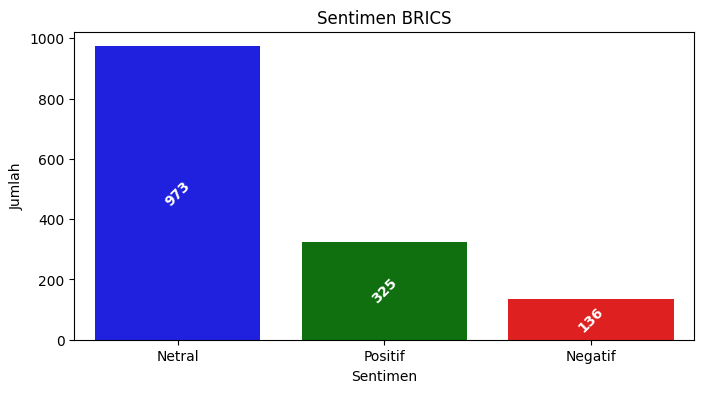

In [25]:
jumlah_sentimen = data['sentimen'].value_counts()

colors = {
    'Positif' : 'green',
    'Negatif' : 'red',
    'Netral'  : 'blue'
}

plt.figure(figsize=(8, 4))
bars = sns.barplot(
    x=jumlah_sentimen.index,
    y=jumlah_sentimen.values,
    palette=[colors[label] for label in jumlah_sentimen.index]
)

for bar, count in zip(bars.patches, jumlah_sentimen.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{count}',
        ha='center', va='center', color='white', fontweight='bold', rotation=45
    )

plt.title("Sentimen BRICS")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

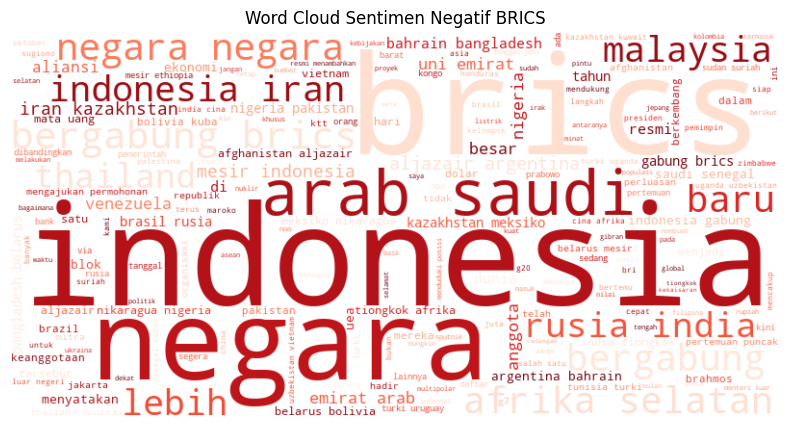

In [32]:
from wordcloud import WordCloud

sentimen_negatif = data[data['sentimen'] == 'Negatif']['stopwords_text']

sentimen_negatif = ' '.join(sentimen_negatif)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(sentimen_negatif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Negatif BRICS")

plt.show()


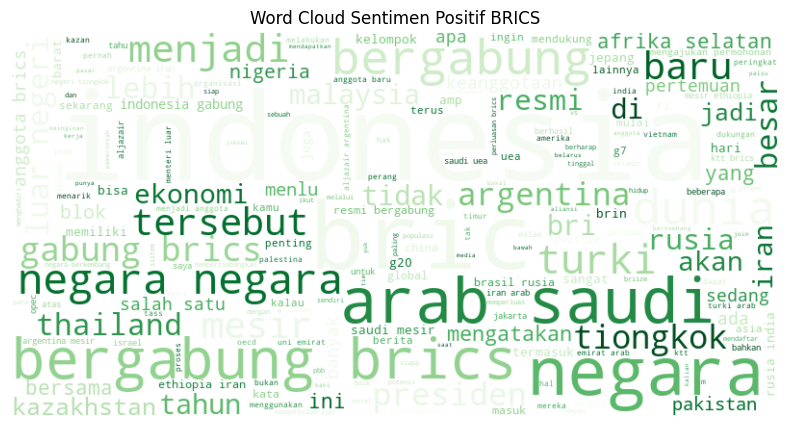

In [37]:
sentimen_positif = data[data['sentimen'] == 'Positif']['stopwords_text']

sentimen_positif = ' '.join(sentimen_positif)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(sentimen_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif BRICS")

plt.show()

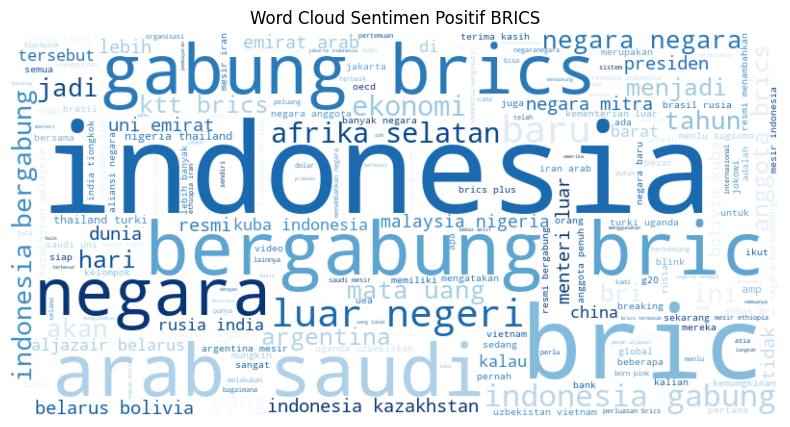

In [38]:
sentimen_netral = data[data['sentimen'] == 'Netral']['stopwords_text']

sentimen_netral = ' '.join(sentimen_netral)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(sentimen_netral)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif BRICS")

plt.show()

In [15]:
data.to_csv("dataset sentimen/brics_processing.csv", index=False)